В этом ноутбуке будет подробно изложено решение задачи 1 из летней практики УПМ-212<br> при помощи языка программирования Python.

✅Для начала сформулируем задание на примере варианта 16.<br>
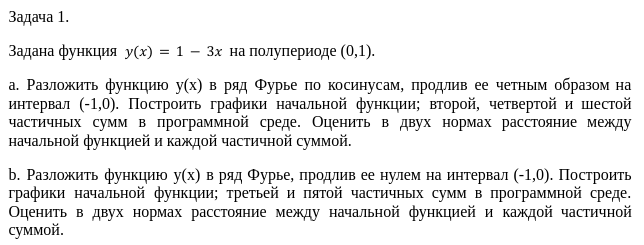<br>
При помощи програмной среды(в нашем случае Python) требуется сделать следующее:
<ul>
    <li>вбить свою функцию y(x)(продолженную) для пункта а;</li>
    <li>вычислить интегралы, задающие a_n и b_n, для пункта а;</li>
    <li>построить на одном графике y(x) и S_2, S_4, S_6 (разных цветов);</li>
    <li>вычислить две нормы (например, максимум модуля и интеграл от модуля разности) для y(x) и каждой частичной суммы;</li>
    <li>вбить свою функцию y(x) (продолженную) для пункта b;</li>
    <li>вычислить интегралы, задающие an и bn, для пункта b;</li>
    <li>построить на одном графике y(x) и S_3, S_5 (разных цветов);</li>
    <li>вычислить две нормы (например, максимум модуля и интеграл от модуля разности) для y(x) и каждой частичной суммы;</li>
</ul>

✅Первым делом импортируем все необходимые библиотеки.

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

✅Остановимся на каждой из них поподробнее.<br>
И начнем с библиотеки numpy - это python библиотека, созданная для упрощения векторных и матричных вычислений,<br>
а также для упрощения некоторых математических операций. Основным объектом в numpy является numpy.array - numpy массив.<br>
В отличии от списков в python массив в numpy может хранить только данные одного типа(его можно явно указать при создании массива,<br> все поддерживаемые типы можно найти в официальной <a href="https://numpy.org/doc/stable/">документации</a> numpy).<br>
Нам же в этих массивах важно то, что для них определены алгебраические операции, т.е. массивы numpy можно поэлементно складывать/вычитать и т.д. друг с другом.<br>
Также в numpy представленно множество различных функций для работы с массивами. Перечислим те, которые нам пригодятся.<br>
<ul>
    <li>numpy.linspace(start, finish, count) - создает массив чисел в диапазоне от start до finish размера count.</li>
    <li>numpy.zeros(x) - создает массив нулей размером x.</li>
    <li>numpy.flip(x) - меняет следование элементов в массиве x.</li>
    <li>numpy.concatenate((a, b), axis) - объединяет массивы a, b вдоль заданной оси axis(подробно про оси в документации).</li>
    <li>numpy.mean(x) - вернет среднее элементов массива x.</li>
</ul>

Пример работы с numpy(для удобства мы импортровали его как np).

In [2]:
# создадим массивы numpy и попробуем поиграться с ними
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [3]:
a + b, a - b, a * b, a / b, a ** b

(array([5, 7, 9]),
 array([-3, -3, -3]),
 array([ 4, 10, 18]),
 array([0.25, 0.4 , 0.5 ]),
 array([  1,  32, 729]))

In [4]:
a * 2, a ** 6

(array([2, 4, 6]), array([  1,  64, 729]))

In [5]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [6]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
np.flip([3, 2, 1])

array([1, 2, 3])

In [8]:
np.concatenate((a, b), axis=0)

array([1, 2, 3, 4, 5, 6])

In [9]:
np.mean([1, 2, 3])

2.0

✅Второй нужной нам библиотекой станет scipy - библиотека для научных и инженерных расчетов.<br>
Из нее нам понадобится только модуль integrate - как не трудно догадаться для численного вычисления определенного интеграла.<br>
Ниже приведен пример использования. С библиотекой можно ознакомится <a href="https://scipy.org/">тут</a>, а с модулем integrate <a href="https://docs.scipy.org/doc/scipy/tutorial/integrate.html">тут</a>.

Для примера будем брать следующий интеграл:<br>
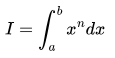<br>

In [10]:
# для начала зададим подынтегральную функцию - она должна быть представлена в виде python функции
# она принимает в качестве аргументов переменную x, по которой будет проходить интегрирование и дополнительный параметр - n
def func(x, n):
    return x ** n

# чтобы посчитать интеграл требуется из модуля integrate вызвать функцию quad
# в себя она принимает подынтегральную функцию, начало отрезка интегрирования и конец отрезка интегрирования
# дополнительные параметры для подынтегральной функции можно передать при помощи аргумента args
n = 2
sp.integrate.quad(func, 0, 1, args=n)
# вернет функция кортеж из двух значений - первое значение и есть вычисленный интеграл, а втрое - погрешность.

(0.33333333333333337, 3.700743415417189e-15)

✅Последние библиотеки - matplotlib и seaborn - нужны нам для построения графиков.<br>
Причем seaborn лишь упращает построения графиков matplotlib, который, в свою очередь, пердоставляет более гибкую настройку.<br>
Seaborn - это тот же matplotlib, но проще.

Приведем пример построения графиков.

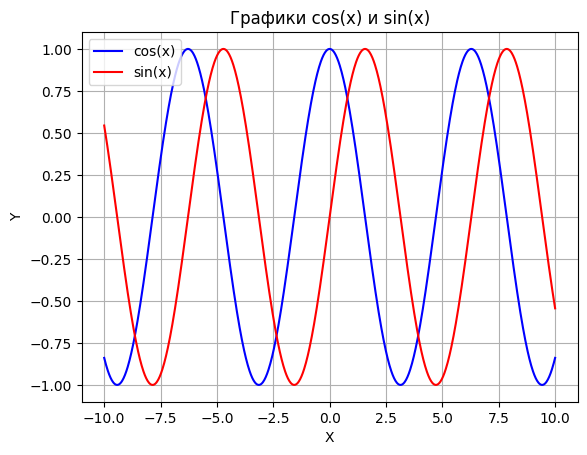

In [11]:
# зададим значения аргумента
x = np.linspace(-10, 10, 1000)

# зададим значения функций
y_cos = np.cos(x)
y_sin = np.sin(x)

# построим линейные графики
plt.plot(x, y_cos, label='cos(x)', color='blue')
plt.plot(x, y_sin, label='sin(x)', color='red')

# добавим подпись к графику
plt.title('Графики cos(x) и sin(x)')
# добавим подписи к осям
plt.xlabel('X')
plt.ylabel('Y')
# добавим отображение легенды
plt.legend(loc='best')
# добавим сетку
plt.grid()
# отобразим график
plt.show()

Сделаем то же самое, но при помощи seaborn

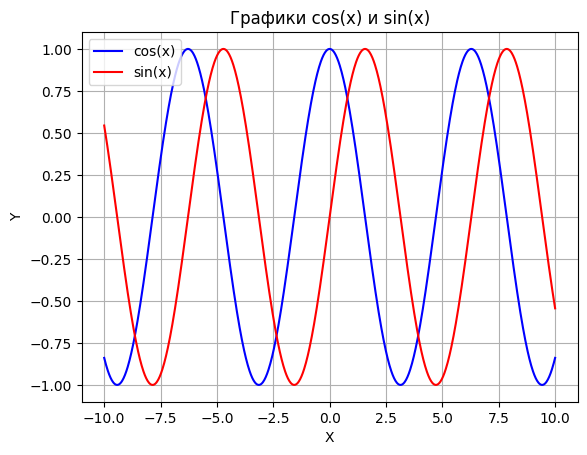

In [12]:
# зададим значения аргумента
x = np.linspace(-10, 10, 1000)

# зададим значения функций
y_cos = np.cos(x)
y_sin = np.sin(x)

# построим линейные графики
sns.lineplot(x=x, y=y_cos, label='cos(x)', color='blue')
sns.lineplot(x=x, y=y_sin, label='sin(x)', color='red')

# по прежнему используем plt, так как seaborn надстройка над matplotlib
# добавим подпись к графику
plt.title('Графики cos(x) и sin(x)')
# добавим подписи к осям
plt.xlabel('X')
plt.ylabel('Y')
# добавим отображение легенды
plt.legend(loc='best')
# добавим сетку
plt.grid()
# отобразим график
plt.show()

✅Переходим к решению задачи. Начнем с пункта А.

Доопределим функцию:<br>
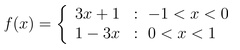

In [13]:
# перепишем ее в виде python функции
# f(x)
def f(x: float) -> float | None:
    if -1 <= x < 0:
        return 3 * x + 1
    elif 0 <= x <= 1:
        return 1 - 3 * x
    return None

❗Запись x: float говорит, что функция f(x) принимает в качестве параметра действительное число(float) - x.<br>
А запись -> float | None говорит, что функция вернет либо действительное число(свое значение в точке интервала),<br>
либо ничего(в таком случае в заданной точке она будет неопределена).<br>
Подробнее стоит посмотреть аннотацию типов в python.

Далее посчитаем частичные суммы. Так как на указанном интервале наша функция четная, то и разложится она только по косинусам.

In [14]:
# считаем частичные суммы
# вычисляем только коэффициенты при косинусе
# используем scipy.integrate
def s(x: np.array, n: int) -> np.array:
    # вычислим коэффициент a_0
    a_0 = 2 * sp.integrate.quad(f, 0, 1)[0]
    # определим интегральную функцию, при помощи которой будем считать коэффициенты ряда в точках
    func = lambda x, n: (1 - 3 * x) * np.cos(np.pi * n * x)
    y = np.zeros(len(x))
    for summator in range(1, n + 1):
        # считаем и добавляем к результату n-ую частичную сумму
        y += 2 * sp.integrate.quad(func, 0, 1, args=(summator))[0] * np.cos(np.pi * summator * x)
    y += a_0 / 2
    return np.concatenate((np.flip(y), y), axis=0)

In [15]:
# зададим отрезок для поиска частичных сумм
x = np.linspace(0, 1, 100)

In [16]:
# сформируем значения 2, 4 и 6 частичных сумм на заданном отрезке(отрезок отражается внутри функции)
s_2 = s(x, 2)
s_4 = s(x, 4)
s_6 = s(x, 6)

In [17]:
# зададим координаты
x_coord = np.linspace(-1, 1, 200)
# важно - следует следить, чтобы координат было в два раза больше, чем отрезок, на котором ищутся суммы, так как его мы отражаем
# в функции в силу ее четности

In [18]:
# сформируем значения функции на всем интервале
f_a = list(map(f, x_coord))

Построим графики.

In [19]:
# зададим стиль
plt.style.use('seaborn-v0_8-darkgrid')

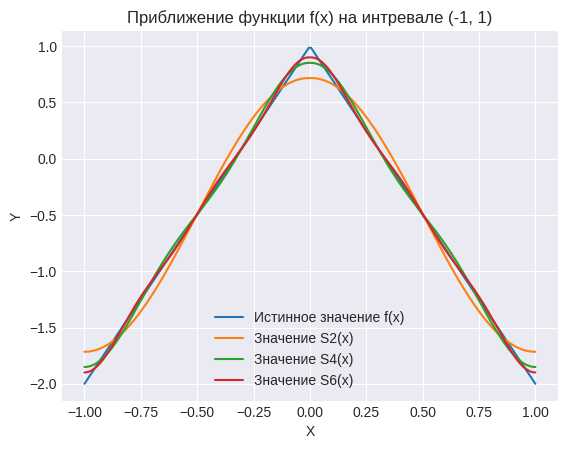

In [20]:
sns.lineplot(x=x_coord, y=f_a, label='Истинное значение f(x)')
sns.lineplot(x=x_coord, y=s_2, label='Значение S2(x)')
sns.lineplot(x=x_coord, y=s_4, label='Значение S4(x)')
sns.lineplot(x=x_coord, y=s_6, label='Значение S6(x)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Приближение функции f(x) на интревале (-1, 1)')
plt.legend(loc='best')
plt.show()

Вычислим нормы для f(x) и каждой найденной частичной суммы.

Будем использовать две нормы:<br>
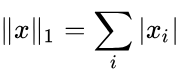<br>
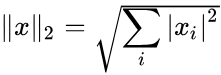<br>
Соответственно метрики приближения будут такими:<br>
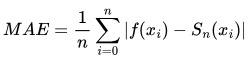<br>
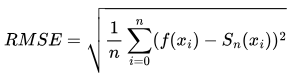

In [21]:
# определим функции для подсчета метрик
def mae(a: np.array, b: np.array) -> float:
    return np.mean(abs(a - b))

def rmse(a: np.array, b: np.array) -> float:
    return np.sqrt(np.mean((a - b) ** 2))

In [22]:
print('Среднее абсолютное отклонение(MAE):')
print(f'f(x) и S_2: {mae(f_a, s_2)}')
print(f'f(x) и S_4: {mae(f_a, s_4)}')
print(f'f(x) и S_6: {mae(f_a, s_6)}')

Среднее абсолютное отклонение(MAE):
f(x) и S_2: 0.09045596490048884
f(x) и S_4: 0.035233996977885124
f(x) и S_6: 0.01978649623756847


In [23]:
print('Корень из среднего квадратического отклонения(RMSE):')
print(f'f(x) и S_2: {rmse(f_a, s_2)}')
print(f'f(x) и S_4: {rmse(f_a, s_4)}')
print(f'f(x) и S_6: {rmse(f_a, s_6)}')

Корень из среднего квадратического отклонения(RMSE):
f(x) и S_2: 0.1072441965011054
f(x) и S_4: 0.04449273847710198
f(x) и S_6: 0.026489003226553794


✅А теперь пункт Б.

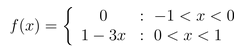

In [24]:
def f(x: float) -> float:
    if 0 <= x <= 1: return 1 - 3 * x
    return 0

In [25]:
# считаем частичные суммы на этот раз ищя все коэффициенты
# используем scipy.integrate
def s(x: np.array, n: int):
    a_0 = sp.integrate.quad(f, 0, 1)[0]
    # определяем интегральные функции для подсчета коэффициентов
    a_n = lambda x, n: (1 - 3 * x) * np.cos(np.pi * n * x)
    b_n = lambda x, n: (1 - 3 * x) * np.sin(np.pi * n * x)
    y = np.zeros(len(x))
    for summator in range(1, n + 1):
        y += sp.integrate.quad(a_n, 0, 1, args=(summator))[0] * np.cos(np.pi * summator * x)
        y += sp.integrate.quad(b_n, 0, 1, args=(summator))[0] * np.sin(np.pi * summator * x)
    y += a_0 / 2
    return np.concatenate((np.zeros(len(x)), y), axis=0)

In [26]:
# сформируем значения 3 и 5 частичных сумм на заданном отрезке(отрезок отражается внутри функции)
s_3 = s(x, 3)
s_5 = s(x, 5)

In [27]:
# сформируем значения функции на всем интервале
f_b = list(map(f, x_coord))

Постороим графики

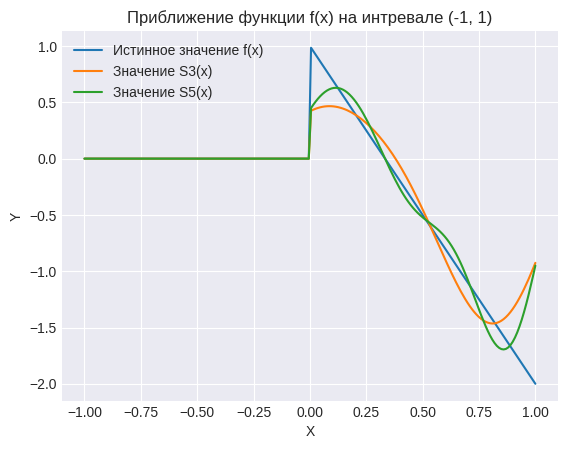

In [28]:
sns.lineplot(x=x_coord, y=f_b, label='Истинное значение f(x)')
sns.lineplot(x=x_coord, y=s_3, label='Значение S3(x)')
sns.lineplot(x=x_coord, y=s_5, label='Значение S5(x)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Приближение функции f(x) на интревале (-1, 1)')
plt.legend(loc='best')
plt.show()

Также посмотрим и на метрики.

In [29]:
print('Среднее абсолютное отклонение(MAE):')
print(f'f(x) и S_3: {mae(f_b, s_3)}')
print(f'f(x) и S_5: {mae(f_b, s_5)}')

Среднее абсолютное отклонение(MAE):
f(x) и S_3: 0.10119546395600271
f(x) и S_5: 0.07283762994684274


In [30]:
print('Корень из среднего квадратического отклонения(RMSE):')
print(f'f(x) и S_3: {rmse(f_b, s_3)}')
print(f'f(x) и S_5: {rmse(f_b, s_5)}')

Корень из среднего квадратического отклонения(RMSE):
f(x) и S_3: 0.21055476175094928
f(x) и S_5: 0.16888602643325498
